Problem statement
- Salary_hike -> Build a prediction model for Salary_hike
- Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings

In [15]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300
%matplotlib inline
sns.set_theme(style='darkgrid',palette='turbo_r')
warnings.filterwarnings('ignore')
LR=LinearRegression()

In [6]:
df=pd.read_csv('Salary_Data.csv')

In [7]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [8]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

<Axes: >

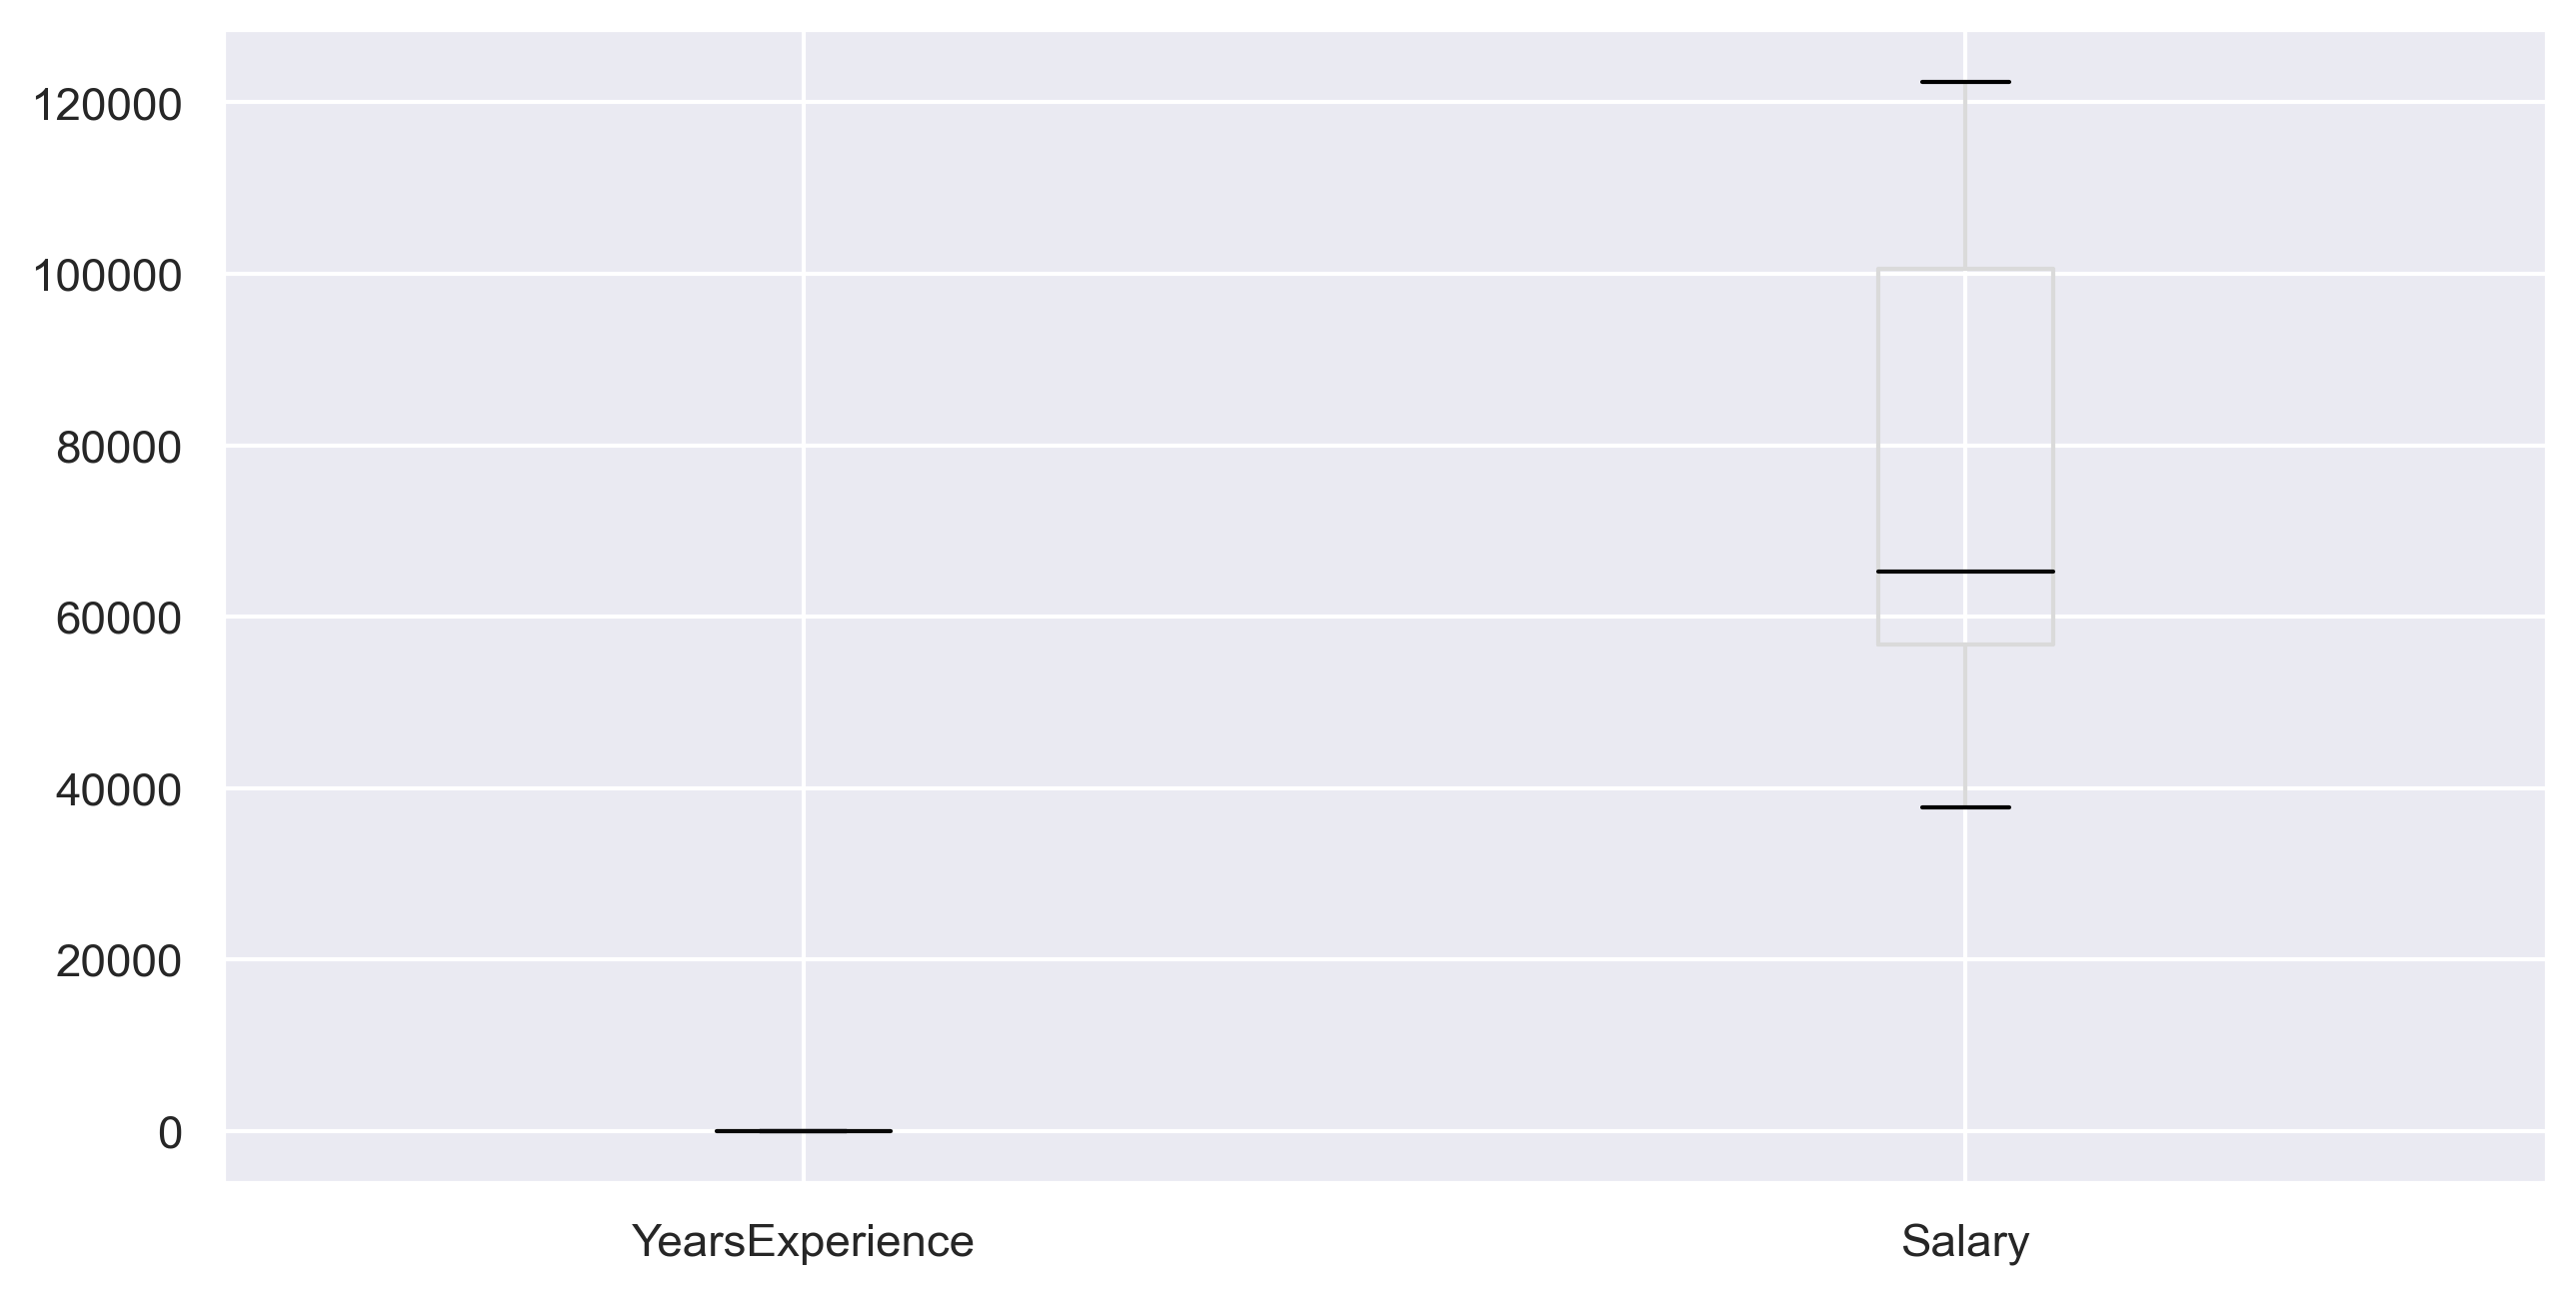

In [9]:
df.boxplot()#no outlier 

In [10]:
df[df.duplicated()]#no duplicates

,YearsExperience,Salary


In [11]:
df.isnull().sum()#no null values

YearsExperience    0
Salary             0
dtype: int64

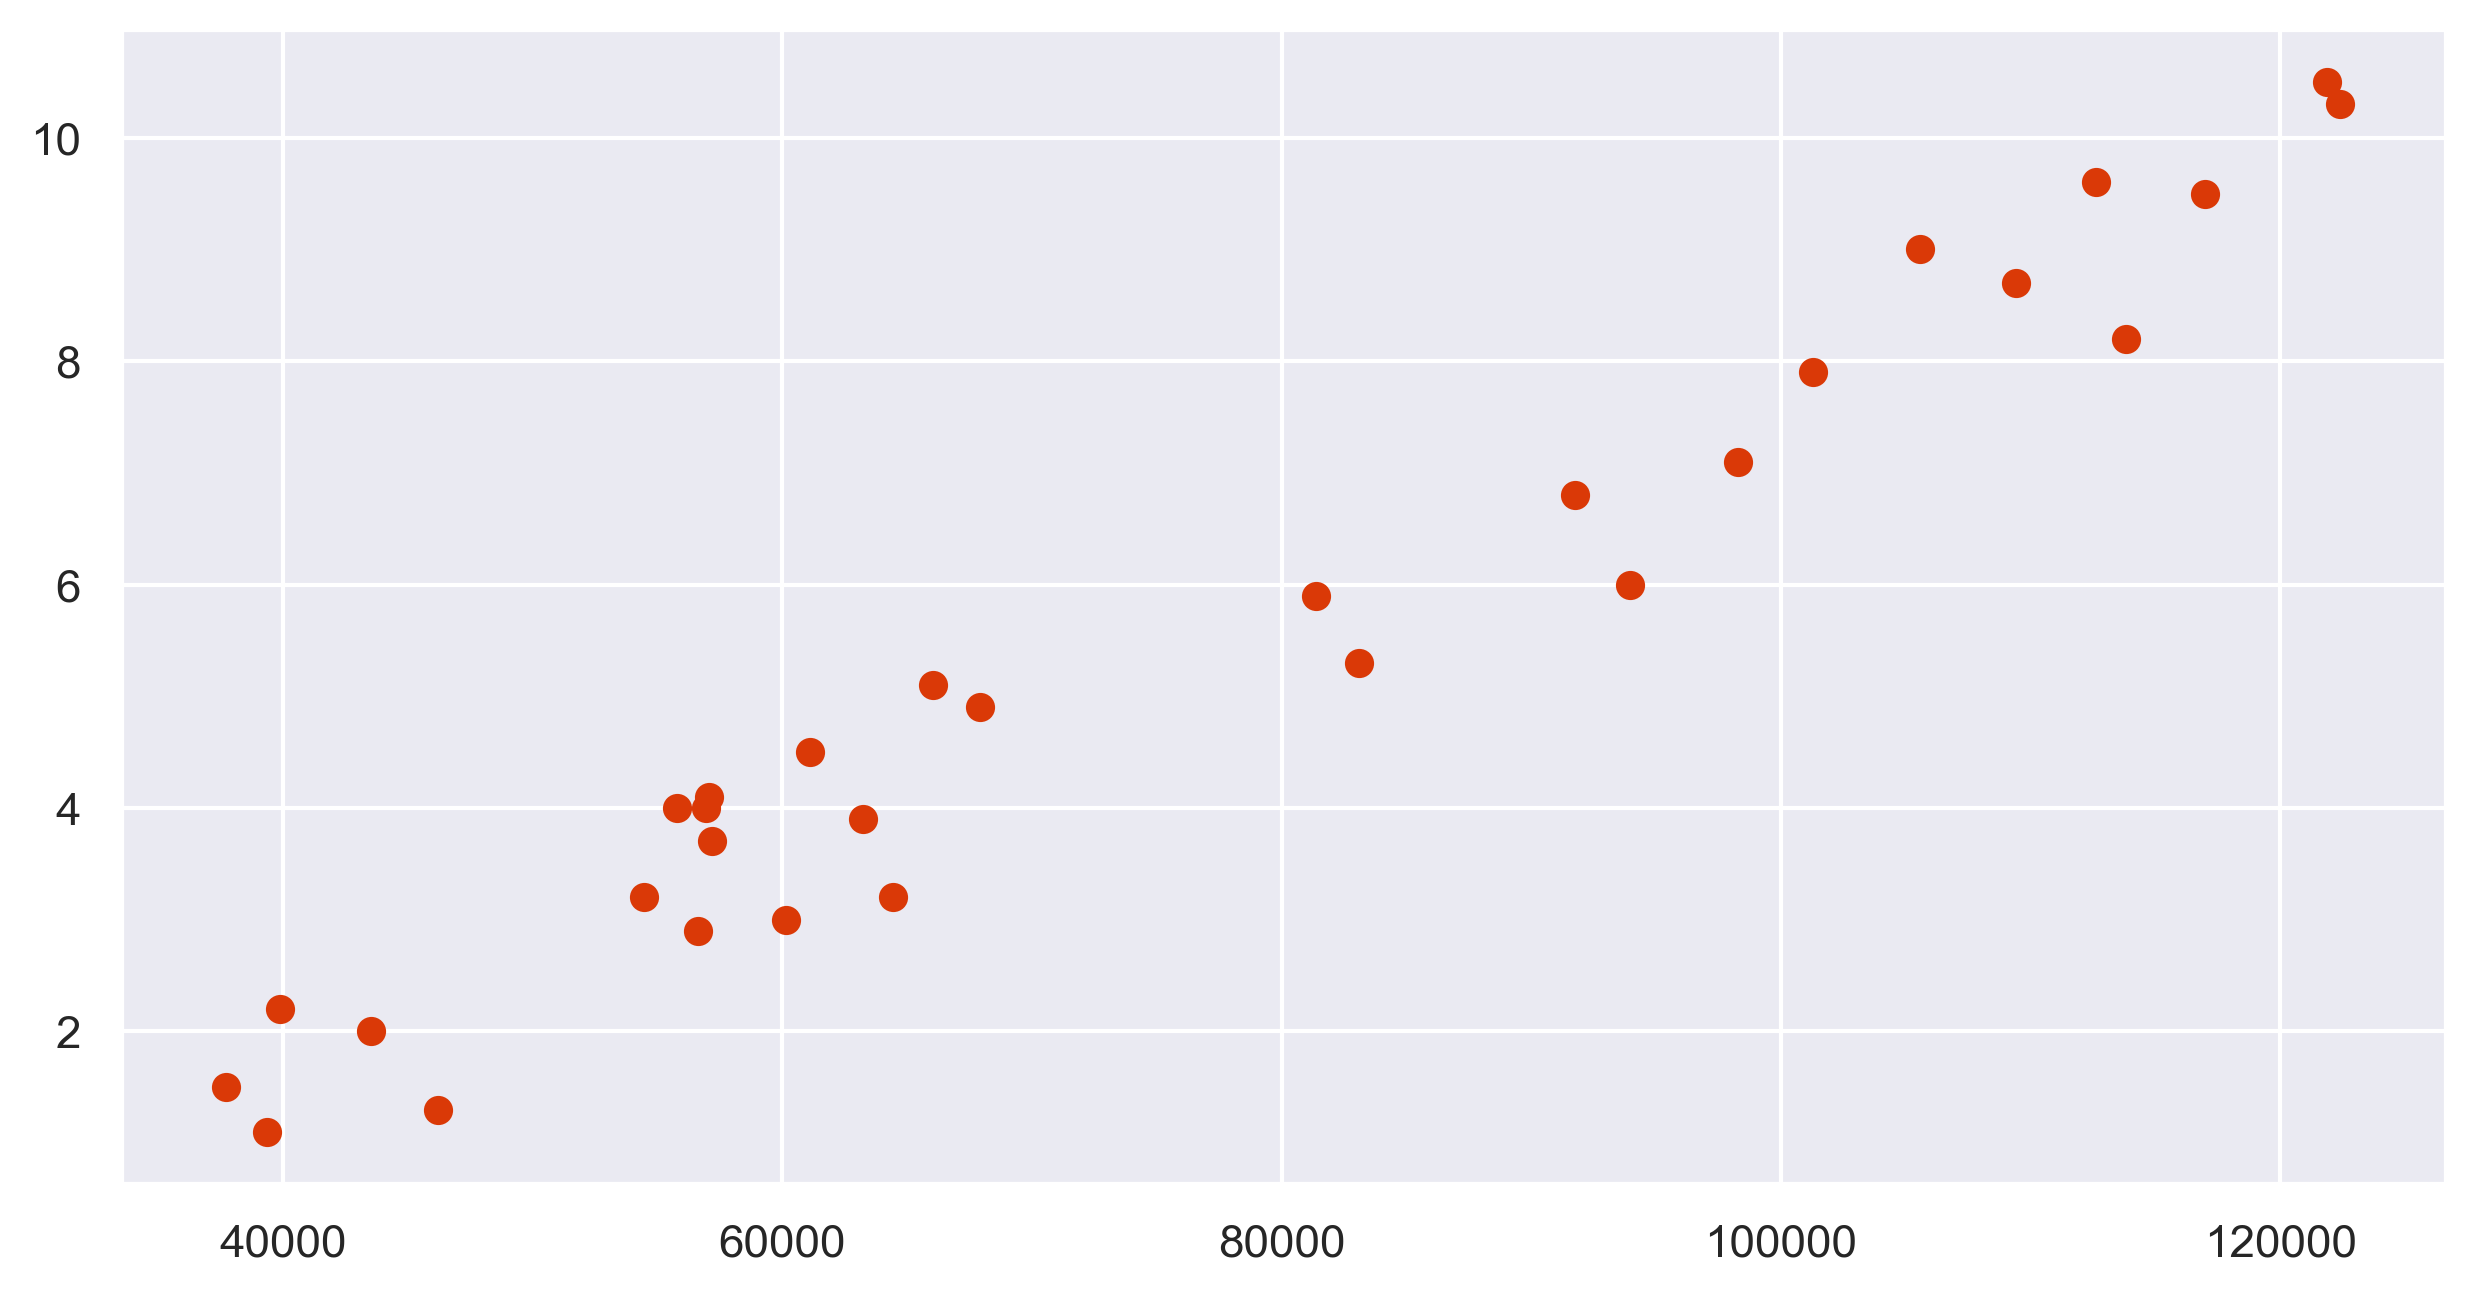

In [12]:
plt.scatter(df['Salary'],df['YearsExperience'])

<Axes: >

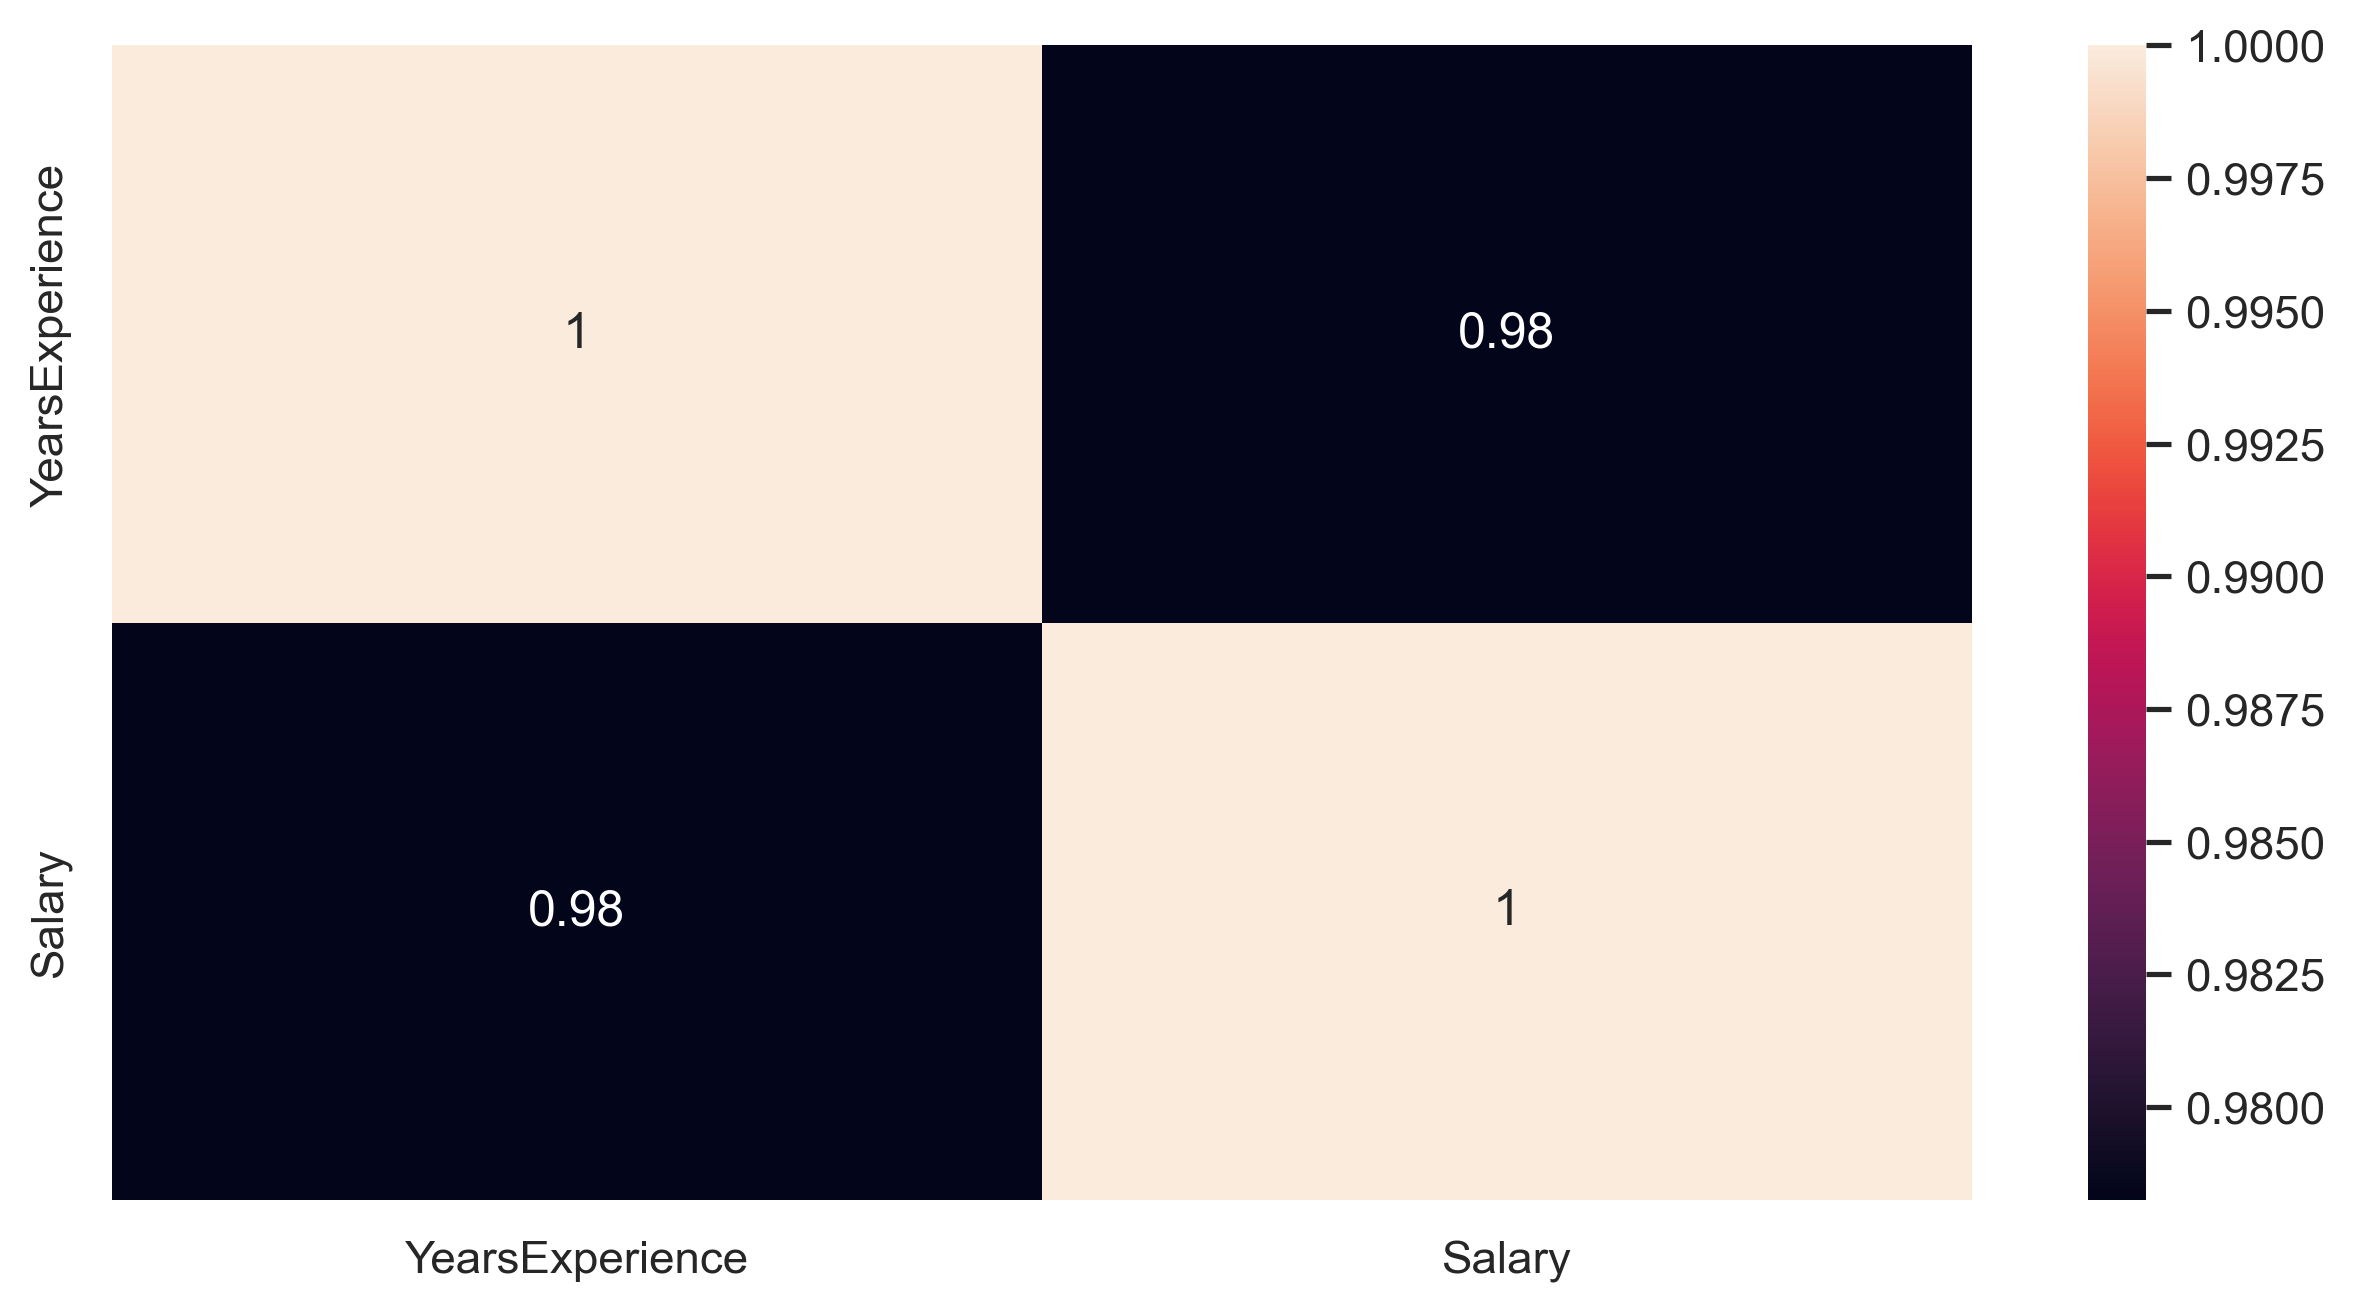

In [13]:
sns.heatmap(df.corr(),annot=True)

In [17]:
x=df[['YearsExperience']]
y=df['Salary']

In [18]:
LR.fit(x,y)

LinearRegression()

In [19]:
LR.intercept_ , LR.coef_

(25792.20019866871, array([9449.96232146]))

In [20]:
y_pred=LR.predict(x)

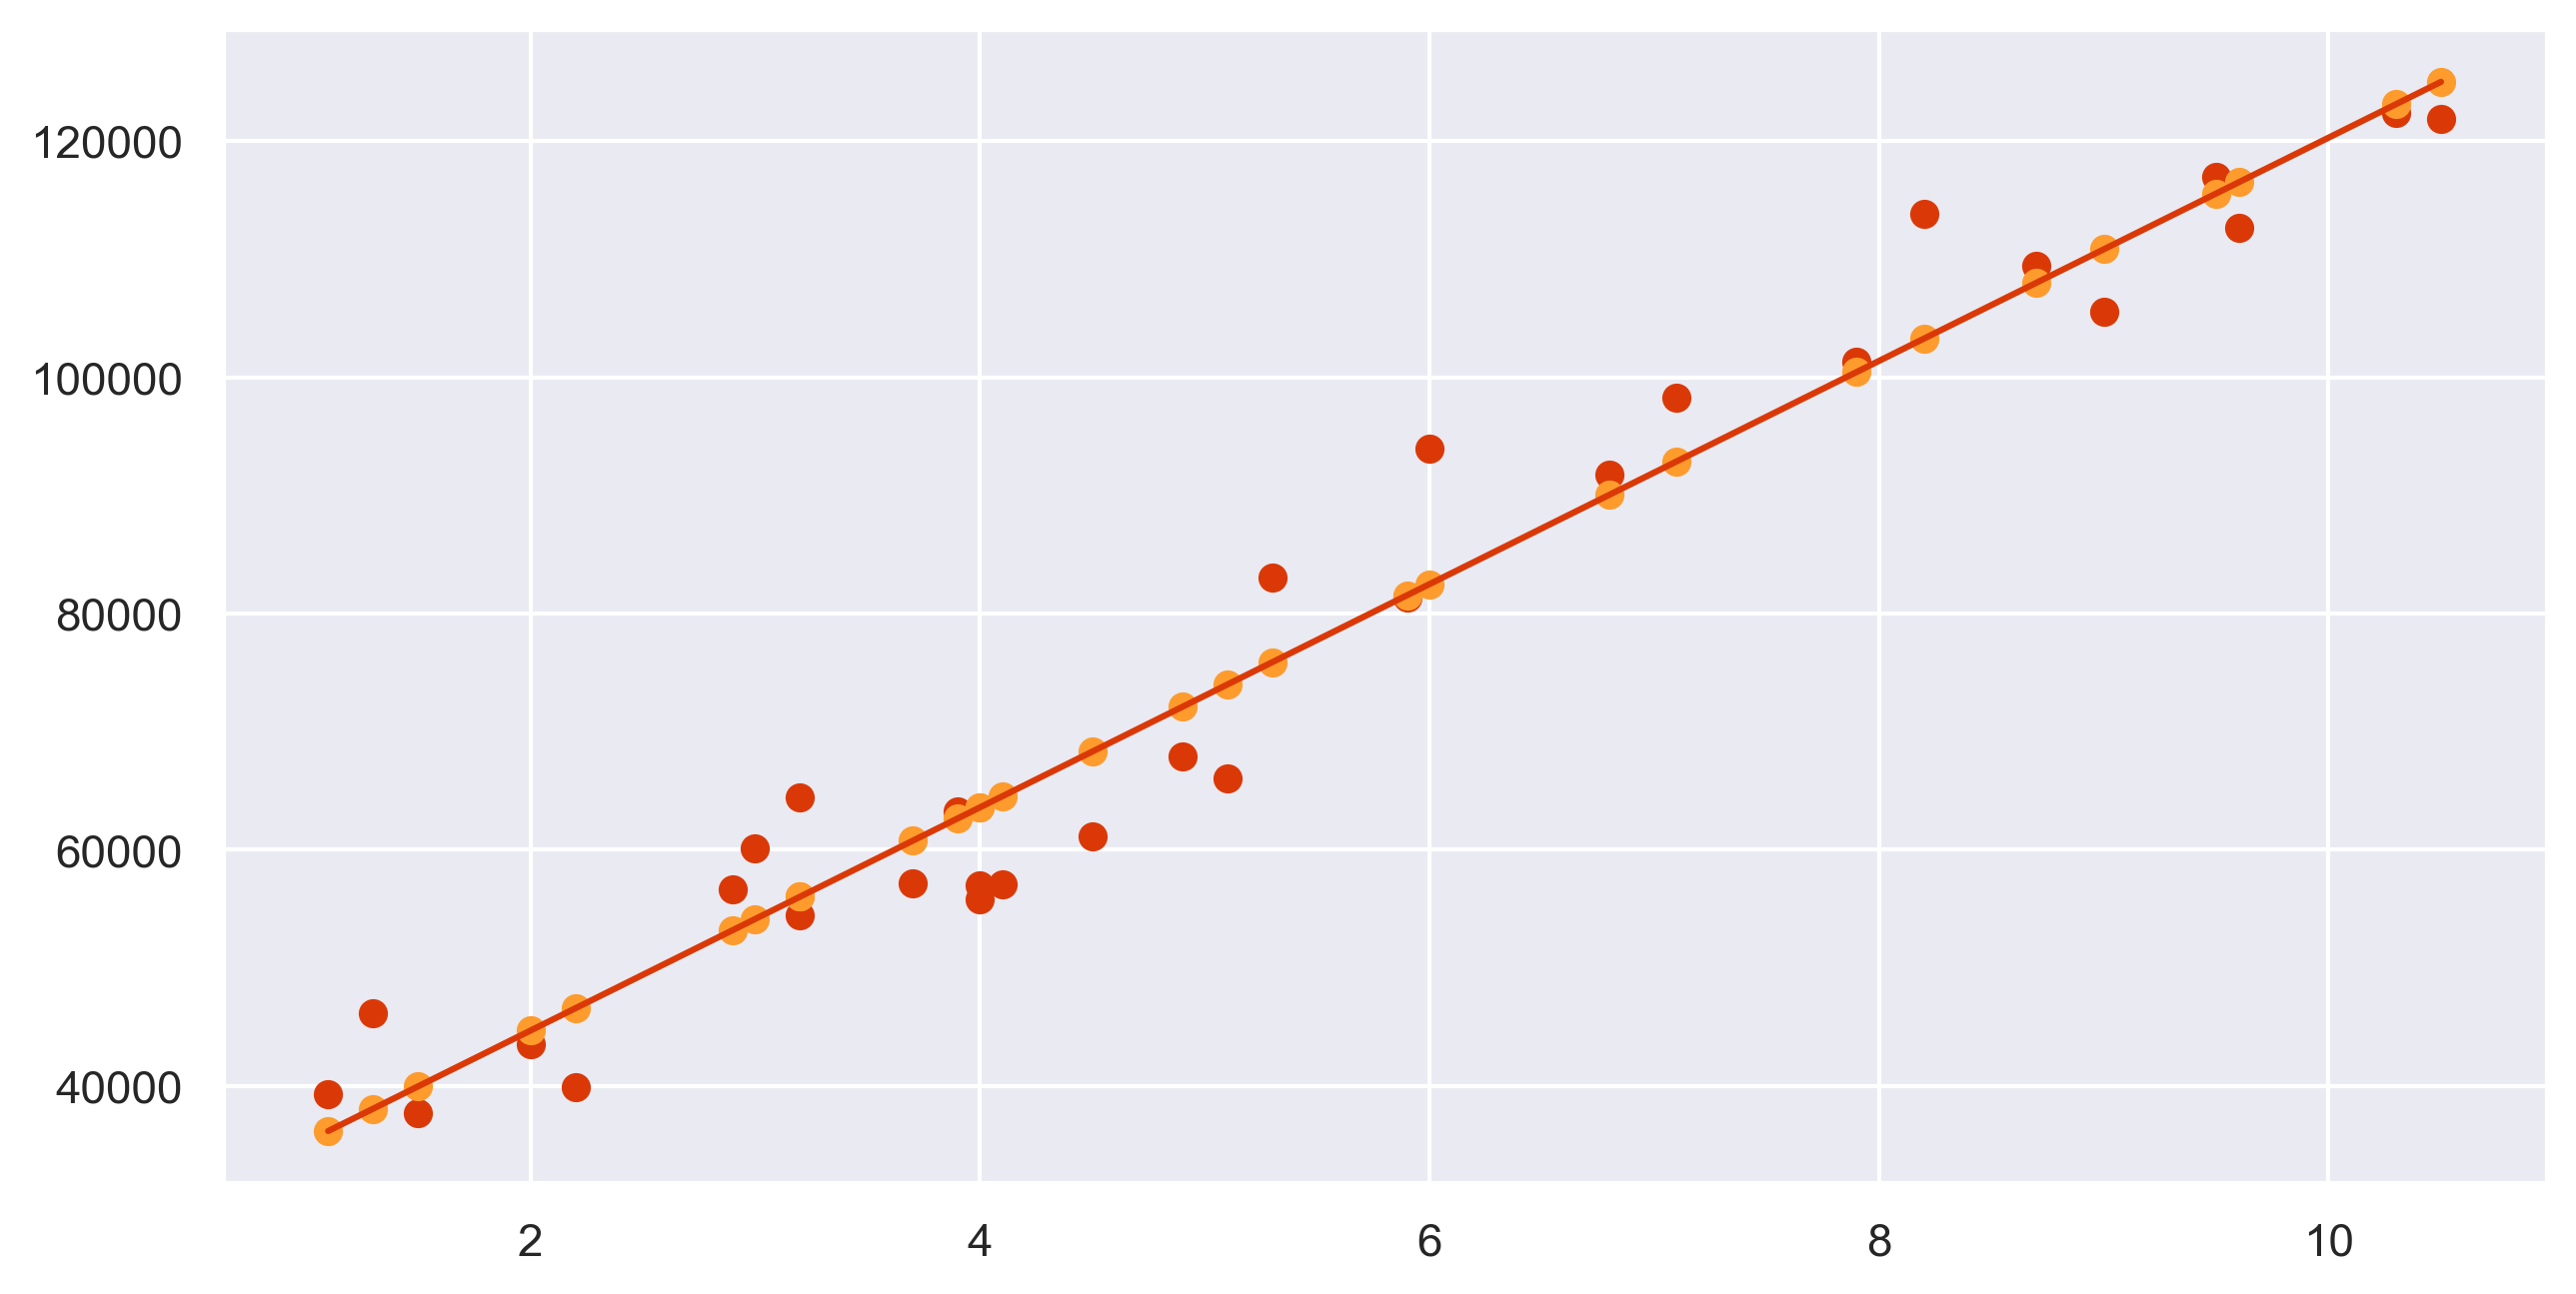

In [22]:
plt.scatter(x,y)
plt.scatter(x,y_pred)
plt.plot(x,y_pred)

In [23]:
mse=mean_squared_error(y,y_pred)
print('Root Mean Square error:',np.sqrt(mse).round(2))

Root Mean Square error: 5592.04


In [24]:
r2=r2_score(y,y_pred)
print("R square:",r2.round(2))

R square: 0.96


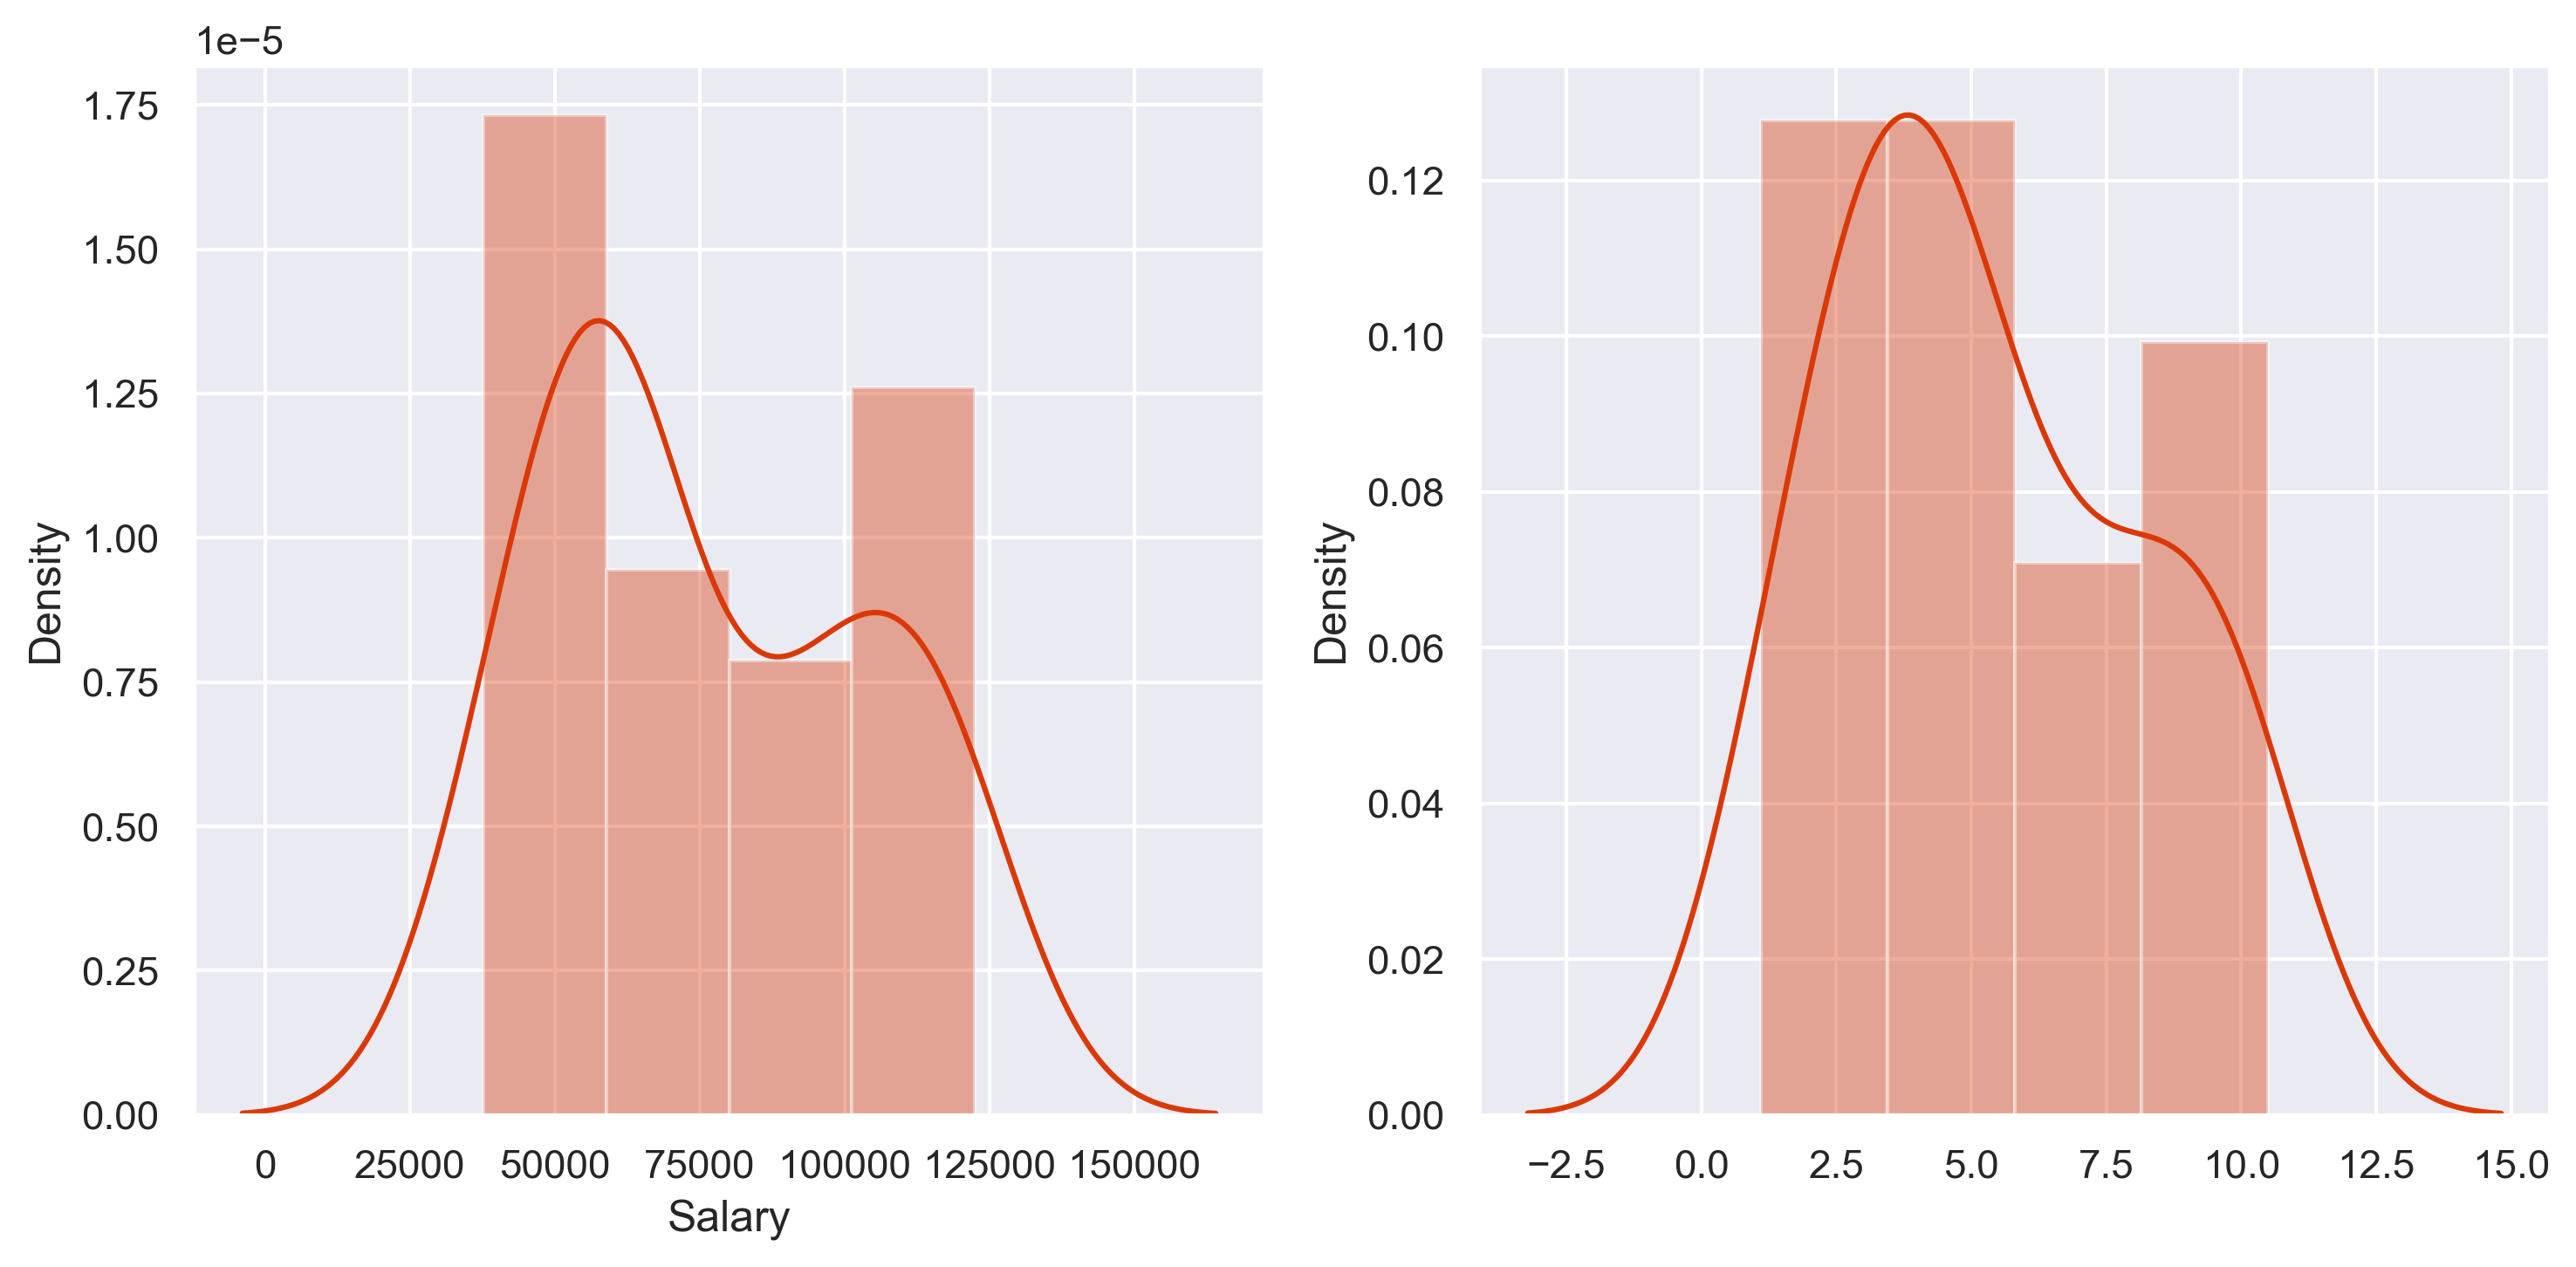

In [26]:
fig,index=plt.subplots(1,2)
sns.distplot(y,ax=index[0])
sns.distplot(x,ax=index[1])
plt.tight_layout()

# Log transformation

In [27]:
df['log_YearsExperience']=np.log(df['YearsExperience'])
df['log_Salary']=np.log(df['Salary'])
df

,YearsExperience,Salary,log_YearsExperience,log_Salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906
5,2.9,56642.0,1.064711,10.944506
6,3.0,60150.0,1.098612,11.004597
7,3.2,54445.0,1.163151,10.904946
8,3.2,64445.0,1.163151,11.073567
9,3.7,57189.0,1.308333,10.954117


In [30]:
log_x=df[['log_YearsExperience']]
log_y=df['log_Salary']

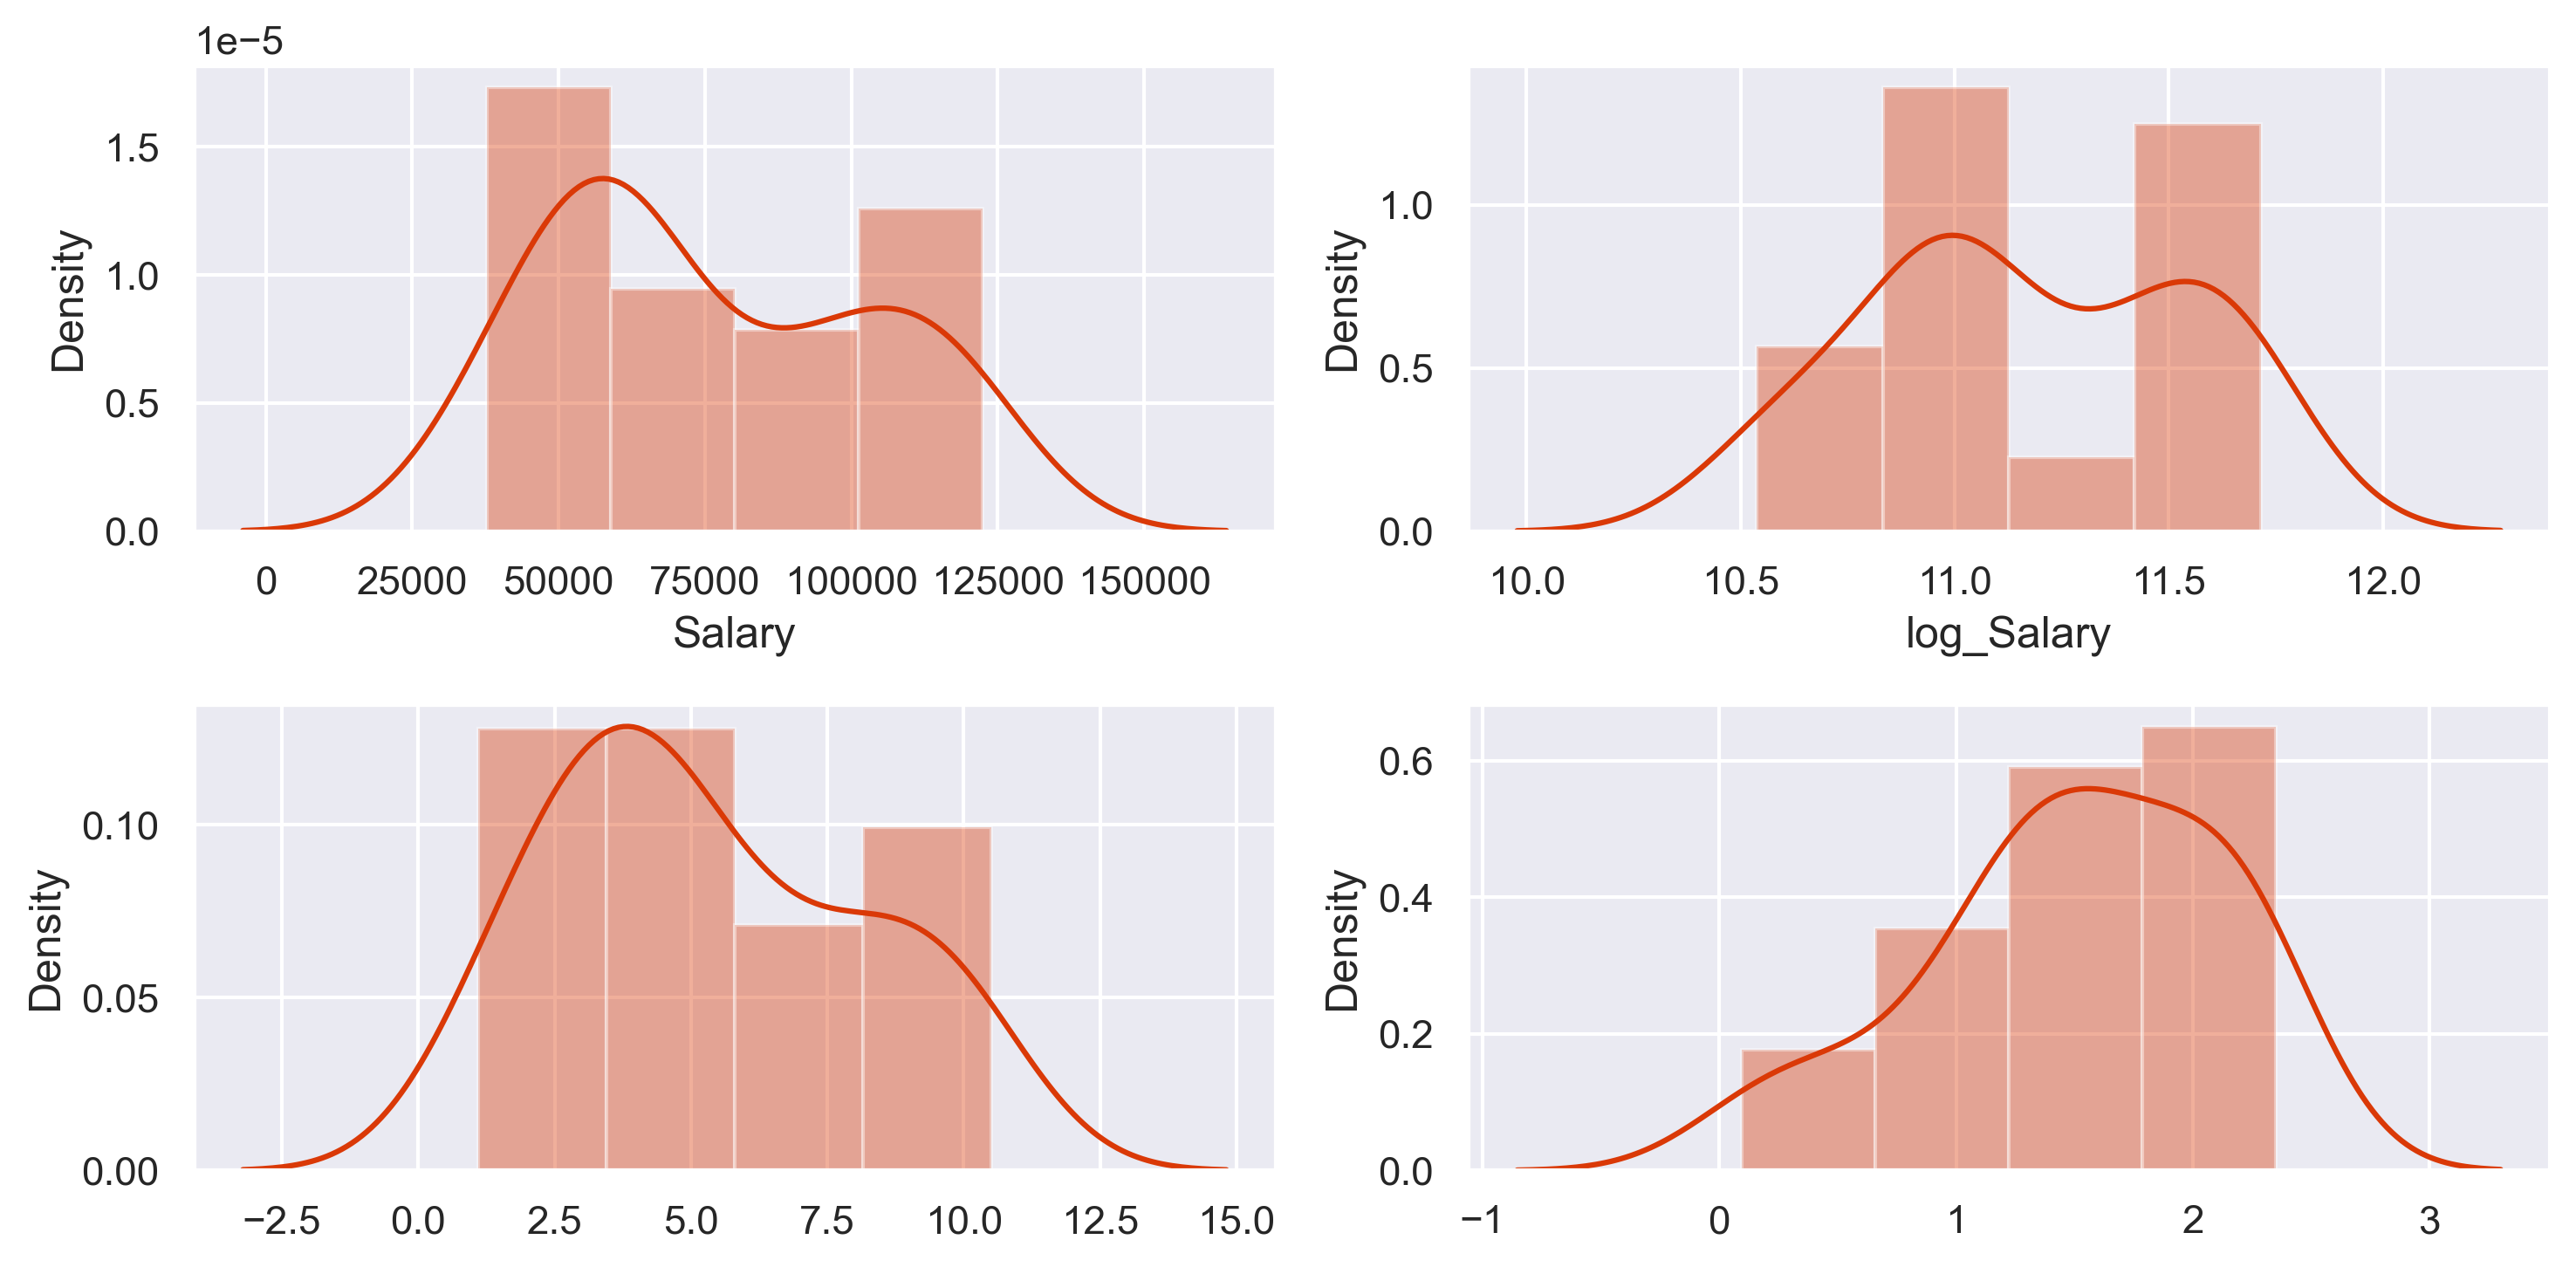

In [31]:
fig,index=plt.subplots(2,2)
sns.distplot(y,ax=index[0,0])
sns.distplot(log_y,ax=index[0,1])
sns.distplot(x,ax=index[1,0])
sns.distplot(log_x,ax=index[1,1])
plt.tight_layout()

In [ ]:
#model fitting after log transformation

In [32]:
LR.fit(log_x,log_y)

LinearRegression()

In [33]:
LR.intercept_ , LR.coef_

(10.328043182475133, array([0.56208883]))

In [35]:
log_y_pred=LR.predict(log_x)

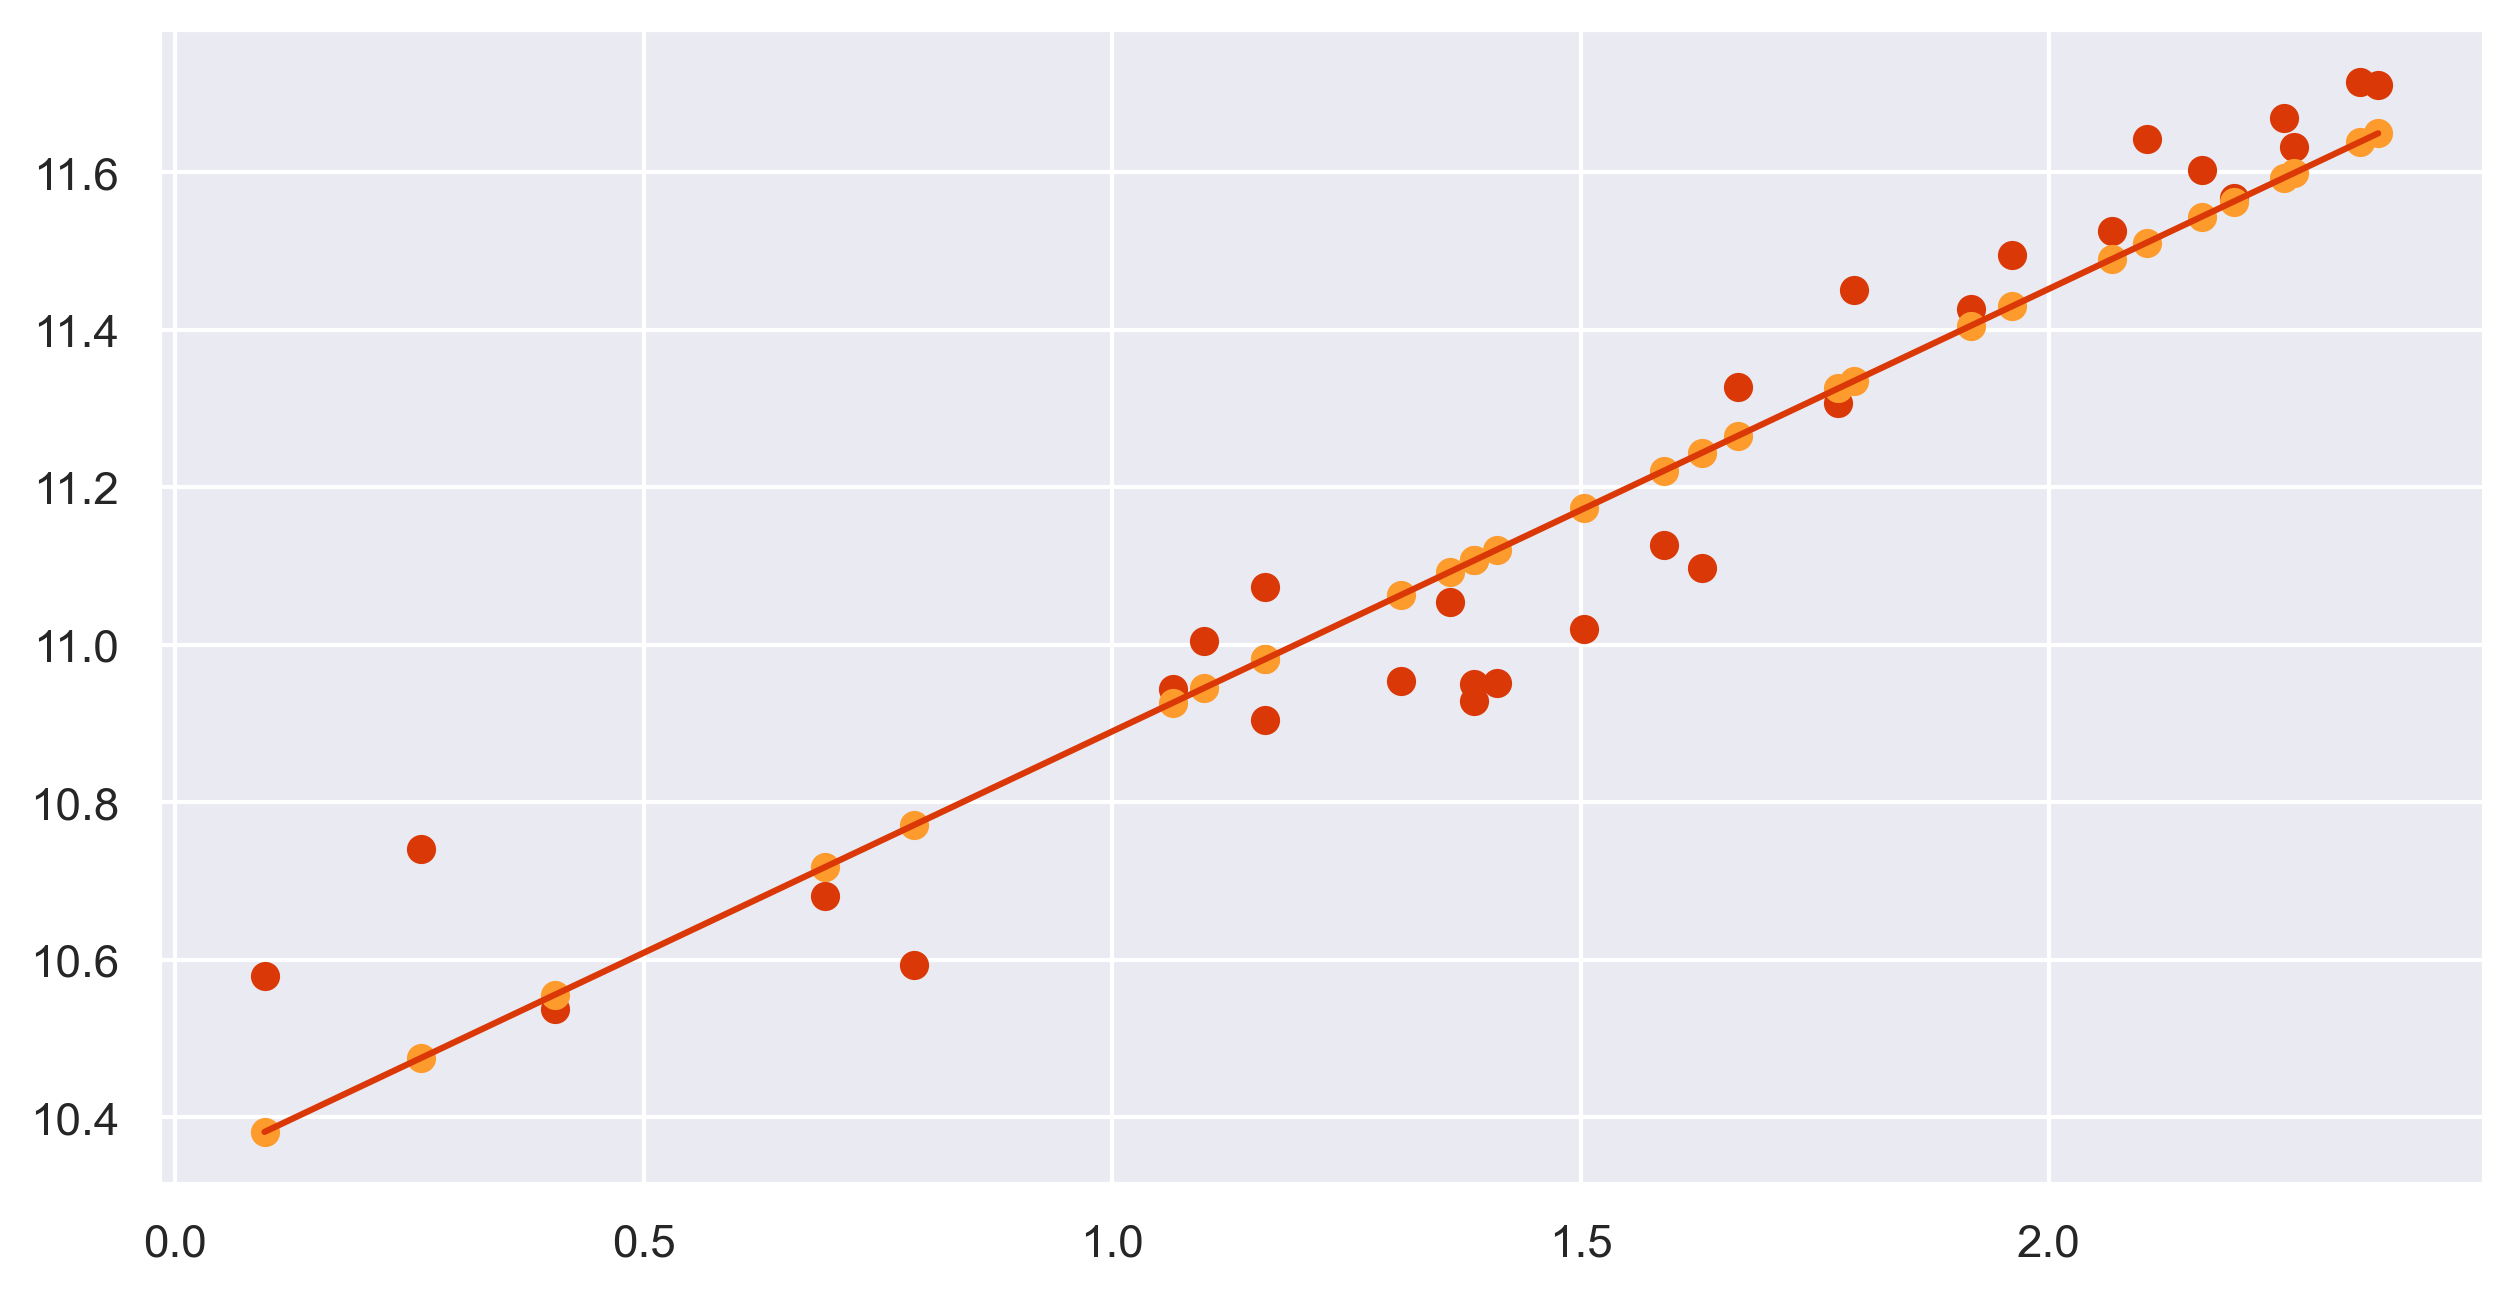

In [40]:
plt.scatter(log_x,log_y)
plt.scatter(log_x,log_y_pred)
plt.plot(log_x,log_y_pred)

In [41]:
mse=mean_squared_error(log_y,log_y_pred)
print('Root Mean Square error:',np.sqrt(mse).round(2))

Root Mean Square error: 0.11


In [42]:
r2=r2_score(log_y,log_y_pred)
print("R square:",r2.round(2))

R square: 0.91


^observe after log transforamtion R square is reduced,so looks like this data does not require log transformation